# XG325: Explainable Artificial Intelligence
    
## Neural Networks (Regression)

**Week 08 | Lecture 04**

_Saturday, April 26, 2025_

Presented by Dr. Marcin Abram

In [1]:
import numpy
import pandas
import tensorflow
import sklearn.linear_model
import sklearn.metrics

numpy.set_printoptions(suppress=True)
numpy.set_printoptions(threshold=10)

import matplotlib.pyplot as plt
%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual

## Regression

In [2]:
# Load dataset
x = numpy.linspace(start=1, stop=2.8, num=1001).reshape(-1, 1)
y = 0.56*x**3 - 4*x**2 + 10*x - 7
y += numpy.random.normal(0, 0.1, size=(1001, 1))

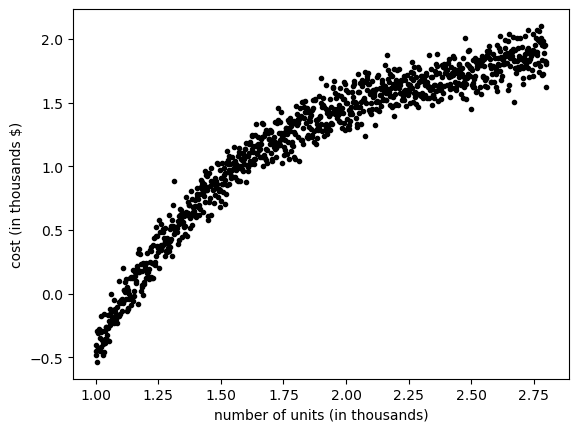

In [3]:
# Plot
plt.plot(x, y, 'k.')
plt.xlabel('number of units (in thousands)'); plt.ylabel('cost (in thousands $)'); plt.show()

## The Smallest Neural Network

In [4]:
"""Build model"""
model = tensorflow.keras.Sequential([
    tensorflow.keras.layers.Flatten(input_shape=(1,)),
    tensorflow.keras.layers.Dense(1, activation='linear'),
])

model.compile(
    optimizer='Adam',
    loss=tensorflow.keras.losses.MeanSquaredError(),
    metrics=['MSE', 'MAE']
)

model.summary()

/opt/miniconda3/envs/deeplearning-env/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-04-26 11:14:47.436382: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-04-26 11:14:47.436417: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-04-26 11:14:47.436429: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-04-26 11:14:47.436610: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-26 11:14:47.436627: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
"""Train"""
model.fit(x, y, epochs=50, validation_data=(x,  y))

Epoch 1/50


2025-04-26 11:14:48.305499: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - MAE: 0.2406 - MSE: 0.1218 - loss: 0.1218 - val_MAE: 0.2362 - val_MSE: 0.1126 - val_loss: 0.1126
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - MAE: 0.2332 - MSE: 0.1103 - loss: 0.1103 - val_MAE: 0.2338 - val_MSE: 0.1102 - val_loss: 0.1102
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - MAE: 0.2356 - MSE: 0.1115 - loss: 0.1115 - val_MAE: 0.2311 - val_MSE: 0.1078 - val_loss: 0.1078
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - MAE: 0.2386 - MSE: 0.1141 - loss: 0.1141 - val_MAE: 0.2268 - val_MSE: 0.1054 - val_loss: 0.1054
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - MAE: 0.2161 - MSE: 0.0960 - loss: 0.0960 - val_MAE: 0.2244 - val_MSE: 0.1032 - val_loss: 0.1032
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - MAE: 0.2347 - MSE: 0.1088 - loss: 0.1088 - val_MAE: 0.2241 - val_MSE: 0.1008 - val_loss: 0.1008
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - MAE: 0.2250 - MSE: 0.1031 - loss: 0.1031 - val_MAE: 0.2204 - val

In [6]:
model.get_weights()

[array([[0.99486023]], dtype=float32), array([-0.69521964], dtype=float32)]

In [7]:
"""Evaluate"""
model.evaluate(x,  y, verbose=2)

32/32 - 0s - 5ms/step - MAE: 0.1829 - MSE: 0.0571 - loss: 0.0571


[0.057091303169727325, 0.057091303169727325, 0.18288090825080872]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


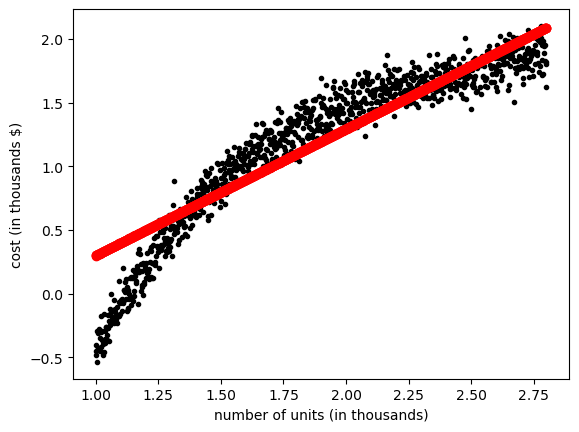

In [8]:
# Plot
plt.plot(x, y, 'k.')
plt.plot(x, model.predict(x), 'ro')
plt.xlabel('number of units (in thousands)'); plt.ylabel('cost (in thousands $)'); plt.show()

## Larger Neural Network

In [9]:
"""Build model"""
model = tensorflow.keras.Sequential([
    tensorflow.keras.layers.Flatten(input_shape=(1,)),
    tensorflow.keras.layers.Dense(300, activation='tanh'),
    tensorflow.keras.layers.Dense(300, activation='tanh'),
    tensorflow.keras.layers.Dense(1, activation='linear'),
])

model.compile(
    optimizer='Adam',
    loss=tensorflow.keras.losses.MeanSquaredError(),
    metrics=['MSE', 'MAE']
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 300)            │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 300)            │        90,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           301 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,201 (356.25 KB)

 Trainable params: 91,201 (356.25 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
"""Train"""
model.fit(x, y, epochs=50, validation_data=(x,  y))

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - MAE: 0.7011 - MSE: 0.8065 - loss: 0.8065 - val_MAE: 0.3019 - val_MSE: 0.1296 - val_loss: 0.1296
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - MAE: 0.2446 - MSE: 0.1151 - loss: 0.1151 - val_MAE: 0.2020 - val_MSE: 0.0854 - val_loss: 0.0854
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - MAE: 0.1905 - MSE: 0.0719 - loss: 0.0719 - val_MAE: 0.1792 - val_MSE: 0.0649 - val_loss: 0.0649
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - MAE: 0.1771 - MSE: 0.0565 - loss: 0.0565 - val_MAE: 0.1828 - val_MSE: 0.0525 - val_loss: 0.0525
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - MAE: 0.1815 - MSE: 0.0528 - loss: 0.0528 - val_MAE: 0.1811 - val_MSE: 0.0491 - val_loss: 0.0491
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - MAE: 0.1826 - MSE: 0.0510 - loss: 0.0510 - val_MAE: 0.1994 - val_MSE: 0.0576 - val_loss: 0.0576
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - MAE: 0.1899 - MSE: 0.0534 - loss: 0.0534 - val_MAE: 0

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


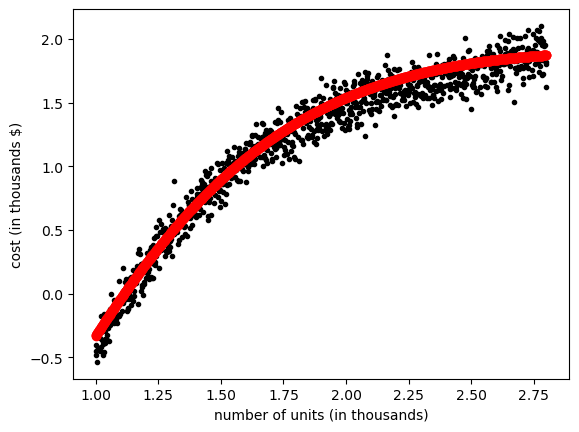

In [11]:
# Plot results
plt.plot(x, y, 'k.')
plt.plot(x, model.predict(x), 'ro')
plt.xlabel('number of units (in thousands)'); plt.ylabel('cost (in thousands $)'); plt.show()